In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
import time

In [37]:
# Load dataset
df = pd.read_excel('dataset_banjir_jkt.xlsx')
df

,Range Tahun,Kecamatan,Rata - Rata Ketinggian Air (cm),Intensitas Curah Hujan (mm/jam),Debit Air (m3/s),Lamanya Hujan (Jam),Target (Banjir/Tidak),Perbaikan Jalan (Ada/Tidak)
0,2023,Tanjung Priok,75,0.56,1973,1,1,1
1,2021,Cakung,35,96.39,2956,1,0,1
2,2022,Kalideres,145,6.68,2165,2,1,0
3,2023,Kemayoran,50,7.13,3681,1,1,0
4,2024,Cakung,75,87.61,2287,4,1,0
...,...,...,...,...,...,...,...,...
205,2021,Tebet,170,56.06,3563,3,0,1
206,2022,Tebet,73,71.31,4619,1,0,0
207,2023,Tebet,123,87.52,4665,3,1,0
208,2024,Tebet,94,20.11,4766,1,0,0


In [70]:
# Tampilkan info dataset untuk memeriksa kolom dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Range Tahun                      210 non-null    int64 
 1   Kecamatan                        210 non-null    object
 2   Rata - Rata Ketinggian Air (cm)  210 non-null    int64 
 3   Intensitas Curah Hujan (mm/jam)  210 non-null    object
 4   Debit Air (m3/s)                 210 non-null    int64 
 5   Lamanya Hujan (Jam)              210 non-null    int64 
 6   Target (Banjir/Tidak)            210 non-null    int64 
 7   Perbaikan Jalan (Ada/Tidak)      210 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 13.2+ KB


In [69]:
# Tampilkan statistik deskriptif untuk memeriksa data
df.describe()

,Range Tahun,Rata - Rata Ketinggian Air (cm),Debit Air (m3/s),Lamanya Hujan (Jam),Target (Banjir/Tidak),Perbaikan Jalan (Ada/Tidak)
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,2022.000000,93.142857,2451.571429,2.428571,0.509524,0.509524
std,1.417593,36.315979,1428.499647,1.131178,0.501104,0.501104
min,2020.000000,25.000000,2.000000,1.000000,0.000000,0.000000
25%,2021.000000,66.000000,1369.500000,2.000000,0.000000,0.000000
50%,2022.000000,87.000000,2443.000000,2.000000,1.000000,1.000000
75%,2023.000000,118.500000,3664.500000,3.000000,1.000000,1.000000
max,2024.000000,170.000000,4962.000000,5.000000,1.000000,1.000000


In [40]:
# --- Data Cleaning ---
# Menghapus kolom yang tidak diperlukan (jika ada)
df.dropna(axis=1, how='all', inplace=True)

In [41]:
# Menghapus baris dengan nilai NaN pada kolom yang relevan
df = df.dropna()

In [42]:
# Menyaring kolom yang relevan untuk model
df['Target (Banjir/Tidak)'] = df['Target (Banjir/Tidak)'].astype(int)  # Pastikan kolom target berupa integer

In [71]:
# Periksa apakah ada nilai NaN setelah konversi
df.isna().sum()  # Mengecek apakah masih ada nilai NaN

,0
Range Tahun,0
Kecamatan,0
Rata - Rata Ketinggian Air (cm),0
Intensitas Curah Hujan (mm/jam),0
Debit Air (m3/s),0
Lamanya Hujan (Jam),0
Target (Banjir/Tidak),0
Perbaikan Jalan (Ada/Tidak),0


In [44]:
# --- Split Data ---
# Menyiapkan fitur (X) dan target (y)
X = df[['Kecamatan', 'Range Tahun', 'Perbaikan Jalan (Ada/Tidak)']]  # Ganti sesuai dengan kolom yang relevan
y = df['Target (Banjir/Tidak)']

In [45]:
# Encoding fitur kategorikal jika perlu (misalnya kecamatan dan range tahun)
X = pd.get_dummies(X, columns=['Kecamatan', 'Range Tahun'], drop_first=True)

In [46]:
# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
# Standardisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# --- Model Naive Bayes ---
# Membuat dan melatih model Naive Bayes
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [49]:
# Prediksi hasil
y_pred = model.predict(X_test_scaled)

In [50]:
# Evaluasi Model
conf_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {acc_score * 100:.2f}%")

Confusion Matrix:
 [[10 18]
 [ 4 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.36      0.48        28
           1       0.63      0.89      0.74        35

    accuracy                           0.65        63
   macro avg       0.67      0.62      0.61        63
weighted avg       0.67      0.65      0.62        63

Accuracy: 65.08%


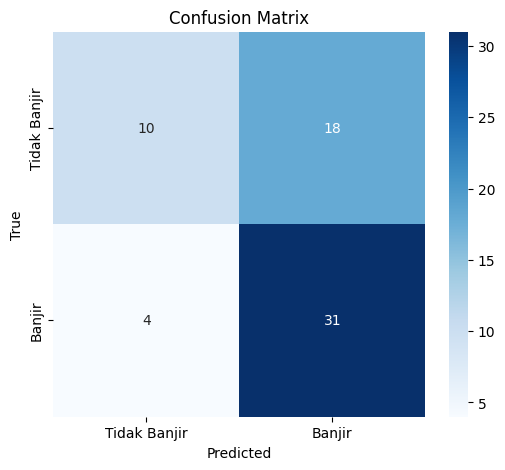

In [51]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Banjir', 'Banjir'], yticklabels=['Tidak Banjir', 'Banjir'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [52]:
# Fungsi untuk membuat Pie Chart berdasarkan tahun yang dipilih
def create_pie_chart_by_year(year):
    df_filtered = df[df["Range Tahun"] == year]
    pie_data = df_filtered["Target (Banjir/Tidak)"].value_counts()

    labels = ["Tidak Banjir", "Banjir"]
    colors = ['skyblue', 'orange']

    # Membuat Pie Chart
    plt.figure(figsize=(6, 6))
    plt.pie(pie_data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
    plt.title(f"Perbandingan Banjir vs Tidak Banjir pada Tahun {year}")
    plt.show()

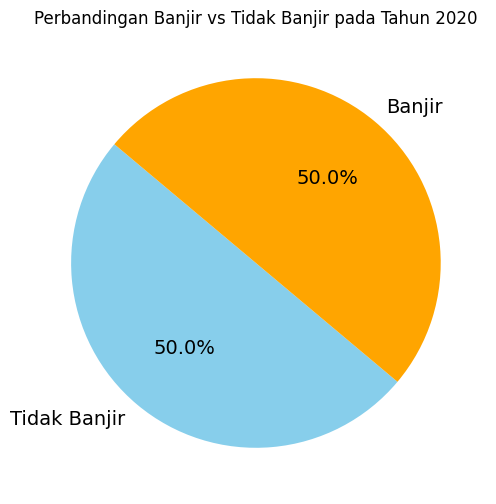

In [53]:
# Contoh penggunaan untuk menampilkan Pie Chart untuk tahun 2020 - 2024
tahun_pilihan = 2020 # Ganti dengan tahun yang diinginkan
create_pie_chart_by_year(tahun_pilihan)

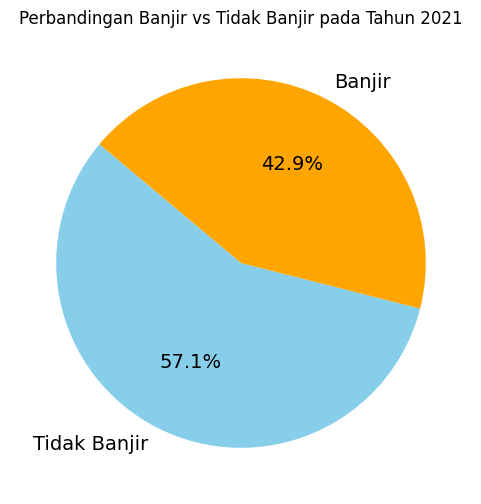

In [54]:
# Contoh penggunaan untuk menampilkan Pie Chart untuk tahun 2020 - 2024
tahun_pilihan = 2021 # Ganti dengan tahun yang diinginkan
create_pie_chart_by_year(tahun_pilihan)

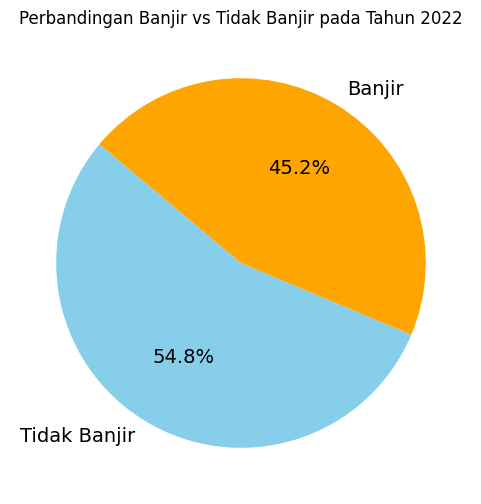

In [55]:
# Contoh penggunaan untuk menampilkan Pie Chart untuk tahun 2020 - 2024
tahun_pilihan = 2022 # Ganti dengan tahun yang diinginkan
create_pie_chart_by_year(tahun_pilihan)

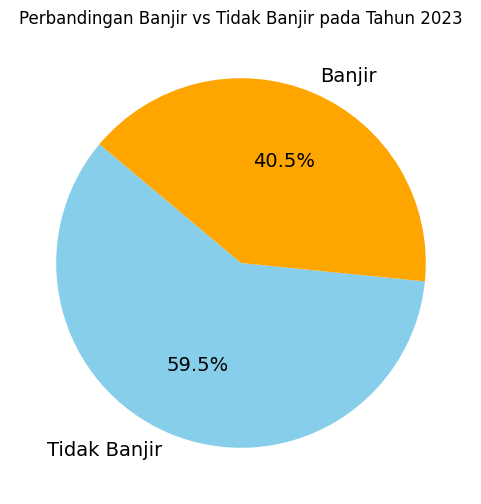

In [56]:
# Contoh penggunaan untuk menampilkan Pie Chart untuk tahun 2020 - 2024
tahun_pilihan = 2023 # Ganti dengan tahun yang diinginkan
create_pie_chart_by_year(tahun_pilihan)

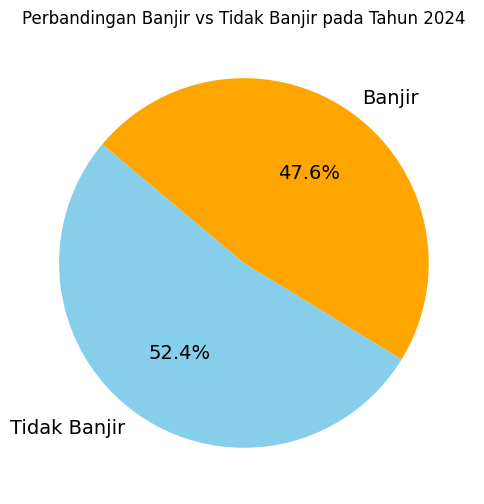

In [57]:
# Contoh penggunaan untuk menampilkan Pie Chart untuk tahun 2020 - 2024
tahun_pilihan = 2024 # Ganti dengan tahun yang diinginkan
create_pie_chart_by_year(tahun_pilihan)

In [58]:
# Inisialisasi geolocator untuk mendapatkan koordinat
geolocator = Nominatim(user_agent="mapping_banjir_jkt", timeout=5)  # Timeout 5 detik
coordinates = {}

In [59]:
# Fungsi untuk membuat peta berdasarkan tahun yang dipilih
def create_map_by_year(year):
    df_filtered = df[df["Range Tahun"] == year]
    m = folium.Map(location=[-6.2, 106.85], zoom_start=11)

    # Tambahkan MarkerCluster untuk mengelompokkan marker
    marker_cluster = MarkerCluster().add_to(m)

    # Loop untuk menambahkan marker ke peta
    for _, row in df_filtered.iterrows():
        kecamatan = row["Kecamatan"]
        status_banjir = row["Target (Banjir/Tidak)"]
        perbaikan_jalan = row["Perbaikan Jalan (Ada/Tidak)"]

        # Periksa apakah koordinat kecamatan sudah ada dalam dictionary
        if kecamatan not in coordinates:
            try:
                location = geolocator.geocode(f"{kecamatan}, Jakarta, Indonesia")
                if location:
                    coordinates[kecamatan] = (location.latitude, location.longitude)
                else:
                    print(f"Koordinat tidak ditemukan: {kecamatan}")
                    continue
            except Exception as e:
                print(f"Error saat mendapatkan koordinat {kecamatan}: {e}")
                time.sleep(1)
                continue

        # Ambil koordinat kecamatan
        lokasi = coordinates.get(kecamatan)
        if lokasi:
            # Tentukan warna marker berdasarkan status banjir
            warna = "red" if status_banjir == 1 else "green"

            # Informasi pop-up
            popup_info = (
                f"<b>Kecamatan:</b> {kecamatan}<br>"
                f"<b>Status Banjir:</b> {'Banjir' if status_banjir == 1 else 'Tidak Banjir'}<br>"
                f"<b>Perbaikan Jalan:</b> {'Ada' if perbaikan_jalan == 1 else 'Tidak'}"
            )

            # Tambahkan marker ke peta
            folium.Marker(
                location=lokasi,
                popup=popup_info,
                icon=folium.Icon(color=warna)
            ).add_to(marker_cluster)

    # Mengembalikan peta yang telah dibuat
    return m

In [60]:
# Contoh penggunaan untuk menampilkan peta untuk tahun 2020-2024
map_result = create_map_by_year(2020)

# Menampilkan peta
map_result

In [61]:
# Contoh penggunaan untuk menampilkan peta untuk tahun 2020-2024
map_result = create_map_by_year(2021)

# Menampilkan peta
map_result

In [62]:
# Contoh penggunaan untuk menampilkan peta untuk tahun 2020-2024
map_result = create_map_by_year(2022)

# Menampilkan peta
map_result

In [63]:
# Contoh penggunaan untuk menampilkan peta untuk tahun 2020-2024
map_result = create_map_by_year(2023)

# Menampilkan peta
map_result

In [64]:
# Contoh penggunaan untuk menampilkan peta untuk tahun 2020-2024
map_result = create_map_by_year(2024)

# Menampilkan peta
map_result

In [75]:
# Asumsikan dataset diunggah dengan nama berikut
df = pd.read_excel('dataset_banjir_jkt.xlsx')

# Data preprocessing
df.dropna(inplace=True)  # Remove missing values
df['Target (Banjir/Tidak)'] = df['Target (Banjir/Tidak)'].astype(int)  # Ensure the target is an integer

# Filter unique kecamatan
kecamatan_relevant = df['Kecamatan'].unique()

# Feature encoding
X = pd.get_dummies(df[['Kecamatan', 'Range Tahun', 'Perbaikan Jalan (Ada/Tidak)']], drop_first=True)
y = df['Target (Banjir/Tidak)']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Create prediction for 2025 with relevant kecamatan only
tahun_2025_data = pd.DataFrame({
    'Kecamatan': kecamatan_relevant,
    'Range Tahun': ['2025'] * len(kecamatan_relevant),
    'Perbaikan Jalan (Ada/Tidak)': [0] * len(kecamatan_relevant)  # Adjust as necessary
})

# One-hot encoding for prediction
X_2025 = pd.get_dummies(tahun_2025_data, columns=['Kecamatan', 'Range Tahun'], drop_first=True)
X_2025 = X_2025.reindex(columns=X.columns, fill_value=0)  # Align columns with training data

# Standardize 2025 data
X_2025_scaled = scaler.transform(X_2025)

# Predict for 2025
predictions_2025 = model.predict(X_2025_scaled)

# Map binary predictions to descriptive labels
prediction_labels = np.where(predictions_2025 == 1, 'banjir', 'tidak banjir')

# Combine kecamatan and predictions
result_2025 = pd.DataFrame({'Kecamatan': kecamatan_relevant, 'Prediksi (Banjir/Tidak)': prediction_labels})

# Function to drop duplicates while normalizing kecamatan names
def drop_duplicates_normalized(df, column_name):
    """
    Drops duplicates from a DataFrame by normalizing text values (case-insensitive, removing extra spaces).
    """
    # Normalize the column (case-insensitive and clean spaces)
    df[column_name] = df[column_name].str.lower().str.strip().str.replace(r'\s+', ' ', regex=True)

    # Drop duplicates
    df_unique = df.drop_duplicates(subset=[column_name]).reset_index(drop=True)

    return df_unique

# Apply the function to remove duplicates from the predictions
result_2025_unique = drop_duplicates_normalized(result_2025, 'Kecamatan')

# Inisialisasi geolocator untuk mendapatkan koordinat
geolocator = Nominatim(user_agent="prediksi_banjir_2025", timeout=10)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Fungsi untuk mendapatkan koordinat setiap kecamatan
def get_coordinates(kecamatan):
    try:
        location = geocode(f"{kecamatan}, Jakarta, Indonesia")
        if location:
            return (location.latitude, location.longitude)
        else:
            return (None, None)
    except Exception as e:
        print(f"Error getting coordinates for {kecamatan}: {e}")
        return (None, None)

# Dapatkan koordinat untuk setiap kecamatan
coordinates = result_2025_unique['Kecamatan'].apply(get_coordinates)
result_2025_unique['Latitude'] = coordinates.apply(lambda x: x[0])
result_2025_unique['Longitude'] = coordinates.apply(lambda x: x[1])

# Filter kecamatan dengan koordinat valid
result_valid = result_2025_unique.dropna(subset=['Latitude', 'Longitude'])

# Buat peta interaktif
m = folium.Map(location=[-6.2, 106.8], zoom_start=11)  # Lokasi pusat Jakarta

# Tambahkan MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Tambahkan marker untuk setiap kecamatan
for _, row in result_valid.iterrows():
    color = 'red' if row['Prediksi (Banjir/Tidak)'] == 'banjir' else 'green'
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(f"<b>Kecamatan:</b> {row['Kecamatan']}<br><b>Prediksi:</b> {row['Prediksi (Banjir/Tidak)']}", max_width=300),
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

# Simpan peta
m.save("prediksi_banjir_2025.html")

# Tampilkan peta
print("Peta berhasil dibuat dan disimpan sebagai 'prediksi_banjir_2025.html'")
m

Peta berhasil dibuat dan disimpan sebagai 'prediksi_banjir_2025.html'


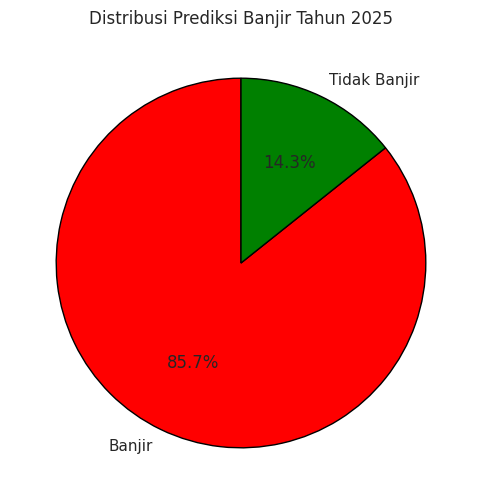

In [67]:
# Buat Pie Chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
result_2025_unique['Prediksi (Banjir/Tidak)'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['red', 'green'],
    labels=['Banjir', 'Tidak Banjir'],
    startangle=90,
    wedgeprops=dict(edgecolor='black')
)
plt.title("Distribusi Prediksi Banjir Tahun 2025")
plt.ylabel('')  # Hilangkan label y
plt.show()

In [76]:
result_2025_unique

,Kecamatan,Prediksi (Banjir/Tidak),Latitude,Longitude
0,tanjung priok,banjir,-6.128858,106.870793
1,cakung,banjir,-6.219081,106.952479
2,kalideres,banjir,-6.137006,106.701594
3,kemayoran,banjir,-6.161703,106.841401
4,cempaka putih,banjir,-6.181214,106.868548
5,kebayoran lama,tidak banjir,-6.249128,106.777782
6,jagakarsa,banjir,-6.330101,106.822237
7,grogol petamburan,banjir,-6.164188,106.788317
8,cengkareng,banjir,-6.152899,106.744718
9,pasar rebo,banjir,-6.324973,106.853376
